

##  **What is Linear Regression?**
Linear Regression is one of the simplest and most widely used **supervised learning** methods in statistics and machine learning.  
Its goal is to find a **linear relationship** between a dependent variable (output) and one or more independent variables (inputs).

---

## Main Idea
Imagine you want to understand the relationship between **study hours** and **exam scores**.  
Linear regression says:  
*"We can find a line (or, in higher dimensions, a plane/hyperplane) that best explains the data."*



---
##  Types of Linear Regression
1. **Simple LR (Simple Linear Regression)**  
   - One input variable.  
   - Example: relationship between *height* and *weight*.  

2. **Multiple LR (Multiple Linear Regression)**  
   - More than one input variable.  
   - Example: relationship between *height + age + exercise* and *weight*.  

3. **Polynomial LR (Polynomial Linear Regression)**  
   - Input variable(s) transformed into polynomial terms.  
   - Example: relationship between *years of experience* and *salary* may follow a curve rather than a straight line.  

---

## Applications
- Prediction (e.g., house price based on size and location)  
- Measuring effects (e.g., impact of advertising on sales)  
- Modeling linear relationships in economics, medicine, engineering, etc.  

---

##  Limitations
- Works best when the relationships are **approximately linear**.  
- Very sensitive to outliers.  
---

## Key Takeaway
**Linear Regression** is about finding a linear relationship between inputs and outputs, to **explain** or **predict** data.  
It’s simple, interpretable, and widely used — but not always the right tool.


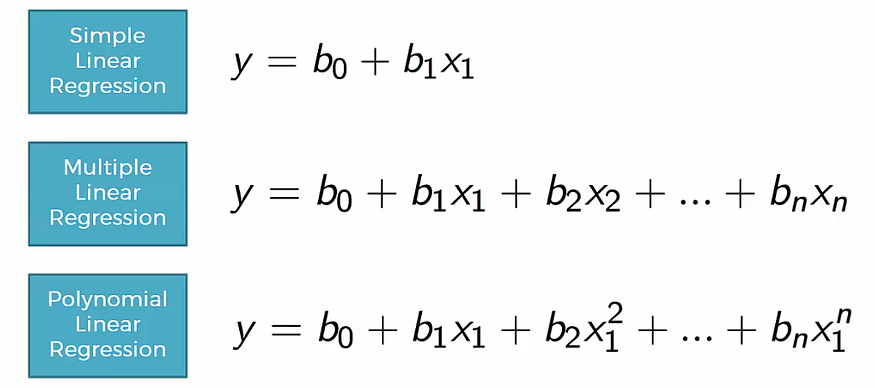

# **Real-World Example: California House Price Prediction**


Now that we understand the basics of **Linear Regression**,let’s move to a **real dataset**: the **California House Dataset**.  
We will use it to **predict house prices** and, along the way,learn important concepts in regression analysis.

Step 1: Exploring the Data
After loading the **California Housing dataset**,  
we should check:
- The shape of the dataset  
- Column names (features)  
- A quick statistical summary  

---

Step 2: Correlation Coefficient
To measure the **linear relationship** between variables,  
we use the **correlation coefficient (Pearson’s r)**:

$$
r = \frac{cov(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

- $r > 0$: positive correlation (when one increases, the other increases)  
- $r < 0$: negative correlation (when one increases, the other decreases)  
- $r \approx 0$: little to no linear correlation  
- $r = 1$: perfect positive linear correlation  
- $r = -1$: perfect negative linear correlation    
---

Step 3: Finding Correlation Between Features
We compute the correlation matrix for all features and target variable.  
This helps us identify which features are most important for predicting house prices.


## Dataset


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [56]:
from sklearn.datasets import fetch_california_housing

# load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.shape

(20640, 9)

In [8]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
# Check for missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


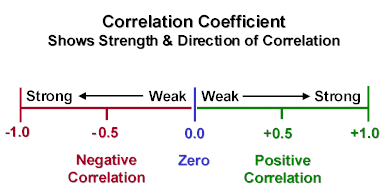

In [15]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(9, 9)

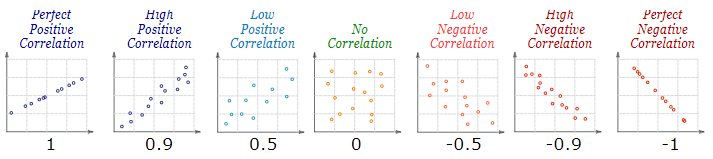


<Axes: >

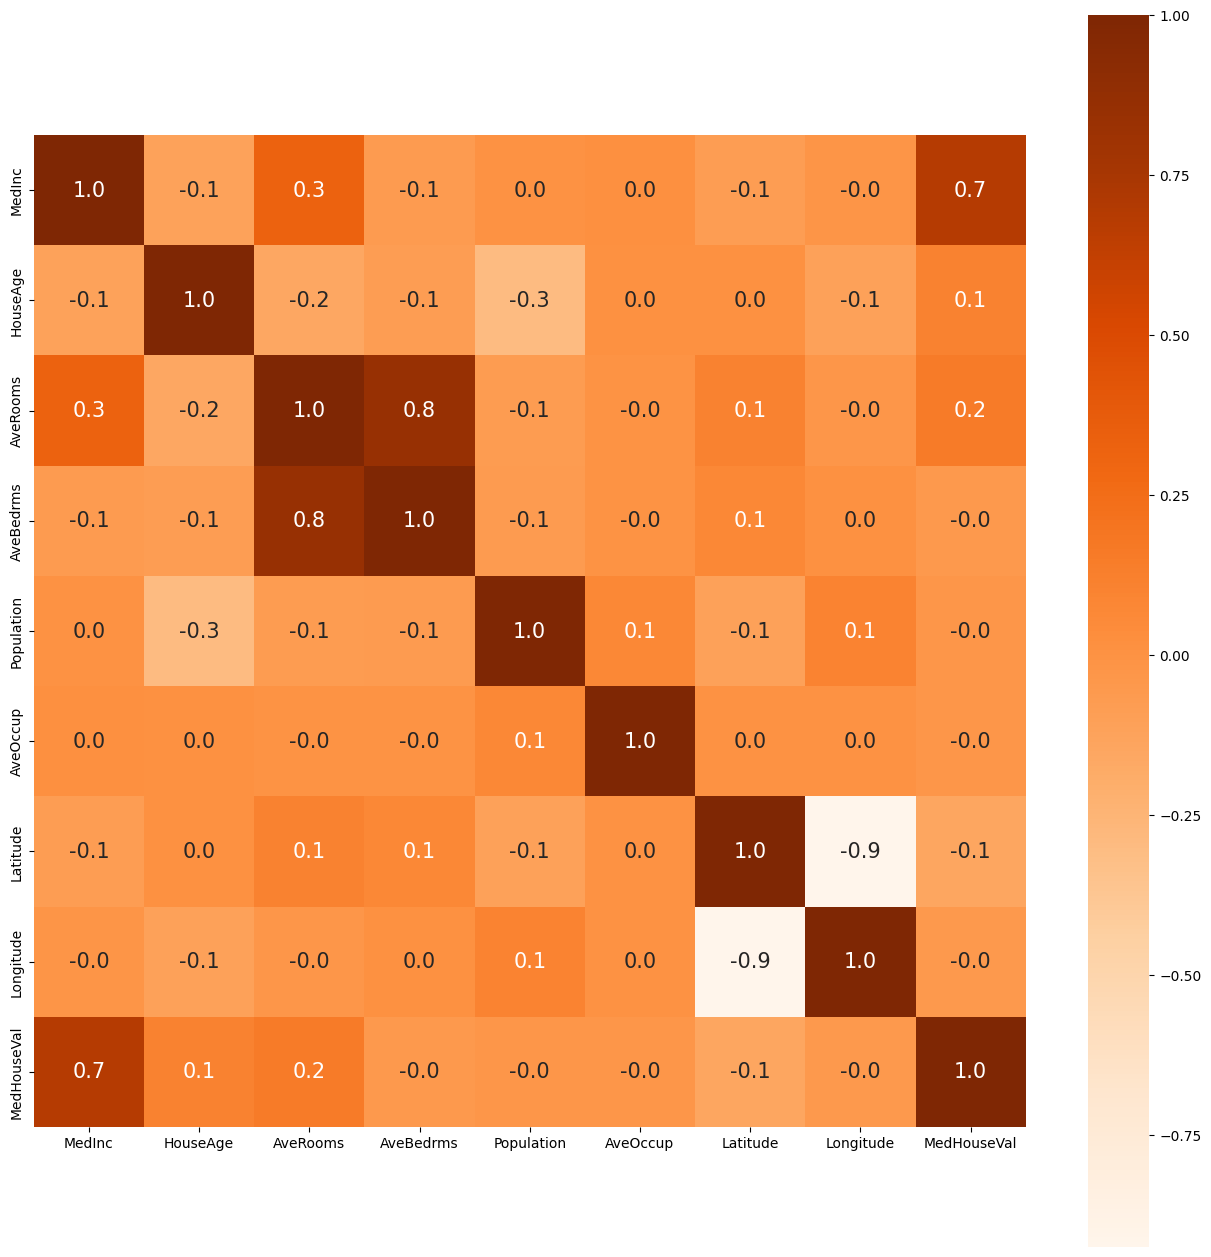

In [16]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Oranges')

## Data Preprocessing

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

feature_names = housing.feature_names


**Why Do We Scale the Data?**

In machine learning, **feature scaling** is an important preprocessing step.  
Here are the main reasons why we scale the data:

1. **Different Units and Ranges**  
   - Features in the dataset may have very different scales  
     (e.g., *Income* in tens of thousands vs. *House Age* in years).  
   - Without scaling, features with larger ranges dominate the model.

2. **Faster and More Stable Training**  
   - Many algorithms (including Linear Regression, Gradient Descent, and Neural Networks)  
     converge faster when features are scaled to a similar range.

3. **Better Numerical Stability**  
   - Scaling reduces the risk of numerical errors and instability  
     caused by very large or very small feature values.

4. **Interpretability of Coefficients**  
   - After scaling, the coefficients in regression models become more comparable  
     because all features are on the same scale.

---
- In our California Housing example, scaling helps ensure that variables like  
**Median Income, Latitude, Longitude, and House Age** all contribute fairly  
to the prediction of **Median House Value**, without one dominating just because of its numeric range.


In [58]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement Linear Regression

In [59]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

##Feature Importance

**Feature Importance in Linear Regression**

In **Linear Regression**, the importance of a feature can be interpreted from the **model coefficients** ($\beta_i$).  
- A larger absolute value of the coefficient → stronger impact on the target variable.  
- A positive coefficient → the feature increases the target.  
- A negative coefficient → the feature decreases the target.  

⚠️ Note: Since features have different scales (e.g., *Income* vs. *House Age*),  
we must **scale the data** before interpreting coefficients, otherwise comparisons are misleading.  

---

**Steps**
1. Standardize the features (so all are on the same scale).  
2. Fit a Linear Regression model.  
3. Extract the coefficients.  
4. Sort and visualize them in a bar chart.  

This gives us a clear picture of **which features are most important** in predicting **Median House Value**.


In [45]:
# Get feature importance (coefficients)
coefficients = model.coef_
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute Importance": abs(coefficients)
})

In [46]:
# Sort by importance
feature_importance = feature_importance.sort_values(by="Absolute Importance", ascending=False)

# Display table
print(feature_importance)


      Feature  Coefficient  Absolute Importance
6    Latitude    -0.891352             0.891352
7   Longitude    -0.865658             0.865658
0      MedInc     0.819684             0.819684
3   AveBedrms     0.316328             0.316328
2    AveRooms    -0.274138             0.274138
1    HouseAge     0.119625             0.119625
5    AveOccup    -0.042522             0.042522
4  Population    -0.005347             0.005347


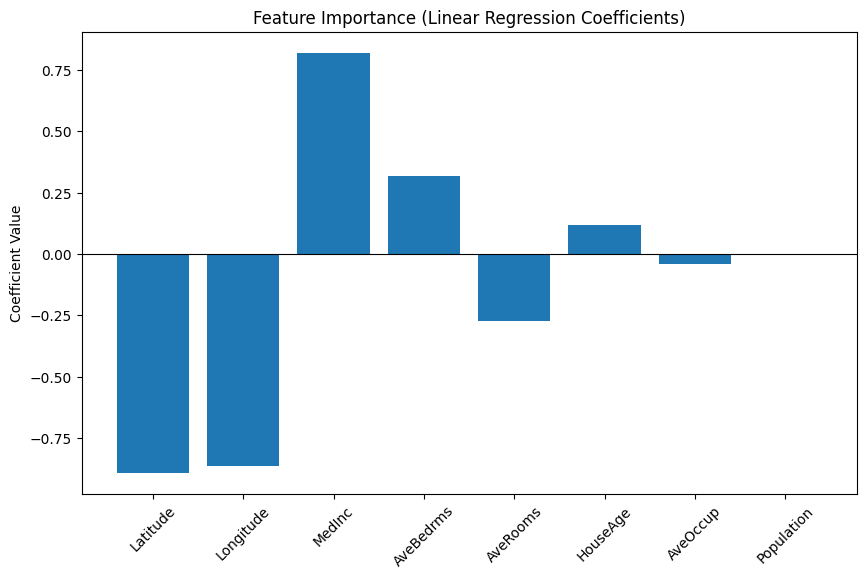

In [47]:
# Plot
plt.figure(figsize=(10,6))
plt.bar(feature_importance["Feature"], feature_importance["Coefficient"])
plt.xticks(rotation=45)
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()

**Permutation Feature Importance**

Unlike regression coefficients, **permutation importance** does not depend on feature scaling.  
It directly measures **how much the model’s performance drops** when the values of a feature are randomly shuffled.

---
**Why Permutation Importance?**
1. **Model-Agnostic** → works with any model, not just Linear Regression.  
2. **Considers Interactions** → reflects the real contribution of a feature in the trained model.  
3. **More Reliable** than just looking at coefficients, especially when features are correlated.  

---

**Steps**
1. Train a regression model (e.g., Linear Regression).  
2. Shuffle each feature one by one.  
3. Measure the change in performance (e.g., using $R^2$).  
4. The bigger the drop → the more important the feature.


      Feature  Importance Mean  Importance Std
6    Latitude         1.192697        0.027120
7   Longitude         1.085176        0.019976
0      MedInc         1.083964        0.017927
3   AveBedrms         0.078951        0.003442
2    AveRooms         0.063969        0.002916
1    HouseAge         0.020680        0.001698
5    AveOccup         0.013354        0.001601
4  Population        -0.000141        0.000070


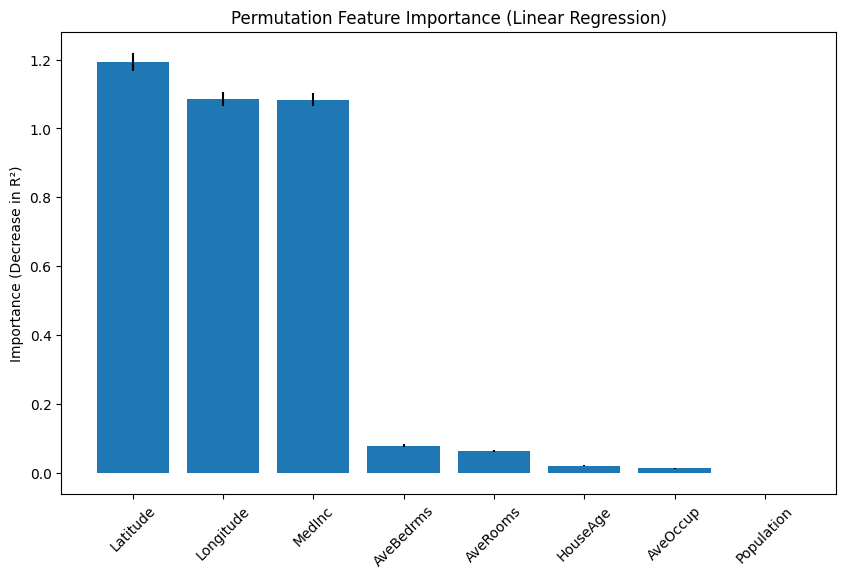

In [34]:
from sklearn.inspection import permutation_importance

# Compute permutation importance on test set
perm_importance = permutation_importance(
    model, X_test_scaled, y_test, n_repeats=20, random_state=42, n_jobs=-1
)

# Create dataframe
perm_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance Mean": perm_importance.importances_mean,
    "Importance Std": perm_importance.importances_std
}).sort_values(by="Importance Mean", ascending=False)

# Display table
print(perm_df)

# Plot
plt.figure(figsize=(10,6))
plt.bar(perm_df["Feature"], perm_df["Importance Mean"], yerr=perm_df["Importance Std"])
plt.xticks(rotation=45)
plt.title("Permutation Feature Importance (Linear Regression)")
plt.ylabel("Importance (Decrease in R²)")
plt.show()


**Comparing Coefficients vs. Permutation Importance**

There are two common ways to measure **feature importance** in regression:

1. **Coefficients (Linear Regression)**  
   - Show the *direction* (positive/negative) and *relative strength* of each feature.  
   - Require scaling to make features comparable.  
   - Do not always reflect the real predictive power, especially with correlated features.  

2. **Permutation Importance**  
   - Model-agnostic → works for any model.  
   - Measures the actual *drop in model performance* when a feature is shuffled.  
   - Captures interactions and correlations better.  

---

**Why Compare Both?**
- **Coefficients** → good for interpretation and understanding the effect size.  
- **Permutation Importance** → good for assessing the true impact on predictions.  
- Together, they provide a more complete picture of feature influence.


## Visualize Actual vs Predicted Prices

In [65]:
# Model prediction on train data
y_pred = model.predict(X_test_scaled)

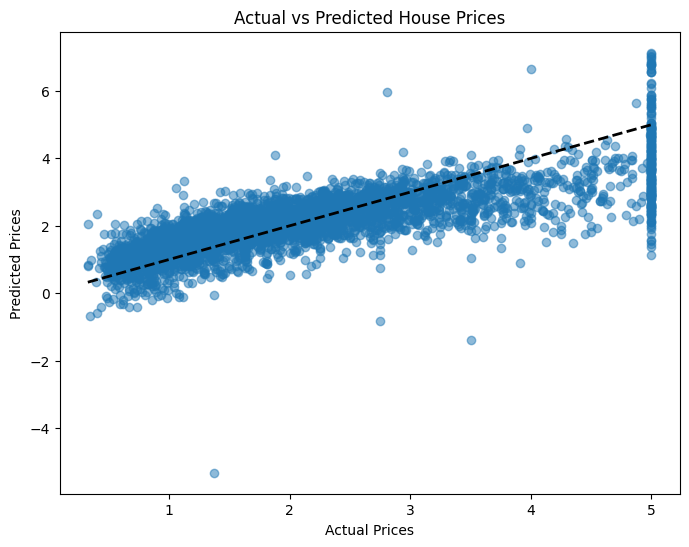

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


## Model (SLR) Evaluation

**Error Metrics in Regression**


When evaluating regression models, we often use error metrics to measure how far the predictions are from the actual values.  
Three of the most common metrics are **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)**.

---

🔹**R² (Coefficient of Determination)**

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

- $y_i$: actual value  
- $\hat{y}_i$: predicted value  
- $\bar{y}$: mean of actual values  
- $n$: number of data points  

**Intuition:**  
- $R^2$ measures the proportion of variance in the target variable explained by the model.  
- $R^2 = 1$ → perfect prediction  
- $R^2 = 0$ → model does no better than predicting the mean  
- $R^2 < 0$ → model is worse than predicting the mean  
---
🔹 **Mean Absolute Error (MAE)**

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

- $y_i$: actual value  
- $\hat{y}_i$: predicted value  
- $n$: number of data points  

**Intuition:**  
MAE is the *average of the absolute differences* between predictions and actual values.  
It gives a direct sense of how far off our predictions are, on average.  

-  Easy to interpret (error in same units as target)  
-  Treats all errors equally (no extra penalty for large errors)  

---

🔹 **Mean Squared Error** (MSE)

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

- $y_i$: actual value  
- $\hat{y}_i$: predicted value  
- $n$: number of data points  

**Intuition:**  
MSE is the *average of squared differences* between predictions and actual values.  
By squaring, large errors are penalized much more heavily.  

-  Useful when we want to strongly penalize big mistakes  
-  Harder to interpret (units are squared compared to the target)  

---

🔹 **Root Mean Squared Error** (RMSE)

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }
$$

- Simply the **square root of MSE**.  
- Brings the error back to the **same unit** as the target variable.  

**Intuition:**  
RMSE is more interpretable than MSE, since it is expressed in the same units as the dependent variable.  
It still penalizes larger errors more, but results are easier to explain.  

-  Same unit as the target → easier to understand  
-  Penalizes big errors more than MAE  
-  More sensitive to outliers than MAE  

---

**Summary**

- **MAE** → Average absolute error → easy to interpret, robust to outliers.  
- **MSE** → Average squared error → emphasizes large errors, not directly interpretable.  
- **RMSE** → Square root of MSE → interpretable (same units as target), still penalizes large errors.  

In practice, we often report **both MAE and RMSE** to get a balanced view of model performance.


In [75]:
predictions=model.predict(X_test_scaled)

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.6161
MAE: 0.5336
MSE: 0.5351
RMSE: 0.7315


**Model Evaluation Considerations**

When evaluating a regression model, there are some important considerations regarding **feature scaling** and **evaluation datasets**.

---

1️⃣ **Scaling Before Evaluation**

- **Not always mandatory:**  
  For Linear Regression, scaling features is **not required** for prediction or calculating metrics like R², MAE, MSE, or RMSE.

- **Recommended situations:**  
  1. **Comparing coefficients (Feature Importance):** Scaling ensures coefficients are comparable across features.  
  2. **Algorithms sensitive to scale:** Gradient Descent, Neural Networks, KNN, SVM, Ridge/Lasso perform better and converge faster with scaled features.

- **Important note:**  
  If you scale the data, the evaluation metrics will correspond to the **scaled values**.  
  To interpret errors in the original units (e.g., house prices), use `inverse_transform()` on predictions before calculating metrics.

---

2️⃣ **Evaluation on Train vs Test**

- **Train Set:**  
  - Evaluates performance on the data the model has already seen.  
  - Useful for detecting **underfitting**.  
  - Metrics (R², MAE, etc.) are usually better (lower error) than on test set.

- **Test Set:**  
  - Evaluates performance on **unseen data**.  
  - Measures the model’s **generalization ability**.  
  - Provides a realistic view of how the model will perform in production.

- **Summary:**  
  - Evaluate both train and test sets to detect **underfitting** or **overfitting**.  
  - Test set evaluation is the primary indicator of real-world performance.


## Polynomial Regression
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.


**Why We Can Use Polynomial Regression on California Housing Dataset**

We have already implemented **Multiple Linear Regression (MLR)** on this dataset,  
using several features simultaneously to predict **Median House Value**.

---

🔹 **Can Polynomial Regression Be Used?**

1. **Non-linear relationships:**  
   - Polynomial Regression helps capture **non-linear patterns** between features and the target.  
   - If scatter plots show curved or non-linear trends, Polynomial Regression is useful.

2. **Testing the model:**  
   - Even if relationships seem mostly linear, adding **interactions or degree 2-3 polynomials** may reduce prediction error.  
   - Compare **R², MAE, MSE, RMSE** between MLR and Polynomial Regression on the test set.

3. **Overfitting caution:**  
   - High-degree polynomials with many features can overfit.  
   - Usually, **degree 2 or 3** is sufficient.  
   - Always evaluate performance on the **test set**.

---

**Summary**

- The **MLR model** we implemented handles multiple features linearly.  
- **Polynomial Regression** can extend MLR to capture non-linear interactions.  
- Test set evaluation ensures the model **generalizes well** and avoids overfitting.


In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [89]:
# Train Polynomial Regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict
y_pred_poly = poly_reg.predict(X_test_poly)

In [90]:
# Evaluate
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print(f"Polynomial Regression Evaluation (degree=2):")
print(f"R²: {r2_poly:.4f}")
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")


Polynomial Regression Evaluation (degree=2):
R²: 0.6457
MAE: 0.4670
MSE: 0.4643
RMSE: 0.6814


In [97]:
# Select one feature (MedInc)
feature_index = feature_names.index('MedInc')
X_feature = X[:, feature_index].reshape(-1, 1)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

# Scale feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X_feature)  # For plotting all data

# Polynomial Features
m = 2  # degree
poly = PolynomialFeatures(degree=m, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Polynomial Regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict for plotting
X_fit = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1,1)
X_fit_poly = poly.transform(X_fit)
y_poly_pred = poly_reg.predict(X_fit_poly)

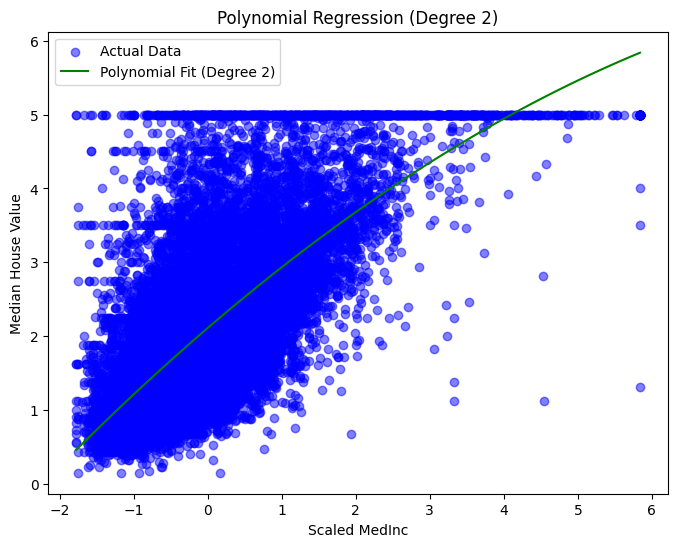

In [98]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_scaled, y, color='blue', alpha=0.5, label='Actual Data', marker='o')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("Scaled MedInc")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error

# Predict on test set
y_test_pred = poly_reg.predict(X_test_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE on test set: {rmse:.4f}")


RMSE on test set: 0.8386


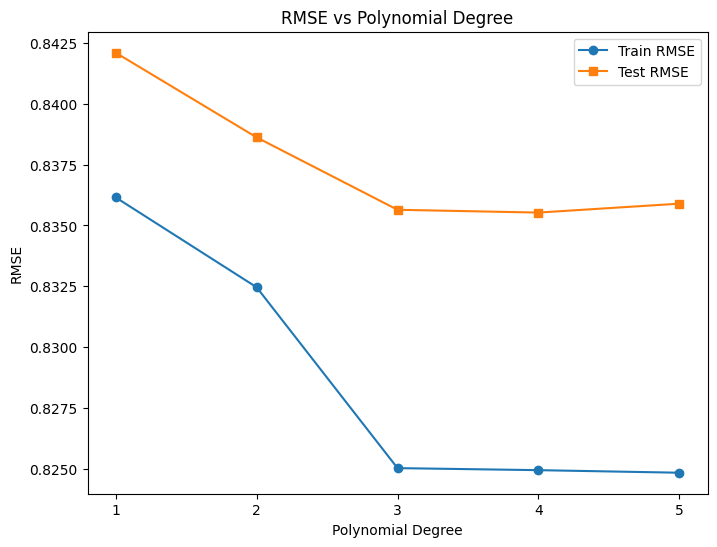

In [101]:
degrees = [1, 2, 3, 4, 5]  # degrees to try
rmse_train = []
rmse_test = []

for m in degrees:
    # Polynomial features
    poly = PolynomialFeatures(degree=m, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Train model
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    # Predict
    y_train_pred = poly_reg.predict(X_train_poly)
    y_test_pred = poly_reg.predict(X_test_poly)

    # Compute RMSE
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plot
plt.figure(figsize=(8,6))
plt.plot(degrees, rmse_train, marker='o', label='Train RMSE')
plt.plot(degrees, rmse_test, marker='s', label='Test RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.xticks(degrees)
plt.legend()
plt.show()


**Understanding RMSE Behavior in Polynomial Regression**

- **Training Error (RMSE on training set)**:  
  - As we **increase the polynomial degree**, the model becomes more flexible and can fit the training data more closely.  
  - This means it can capture more nuances and reduce errors on the training set.  
  - **Therefore, the training error never increases**; it either decreases or stays the same.

- **Testing Error (RMSE on test set)**:  
  - A higher-degree polynomial may **overfit** the training data, capturing noise instead of the true underlying pattern.  
  - This can lead to **worse generalization** on unseen data, causing the test error to **increase after a certain degree**.  

**In short:**  
- Training RMSE decreases with degree (more flexibility).  
- Test RMSE may decrease initially but can rise later due to overfitting.


## Ridge and Lasso Regression

## 1. Ridge Regression (L2 Regularization)

**Main Idea:**  
- When features are correlated or there are many features, **linear regression can produce large coefficients and unstable models**.  
- **Ridge Regression** adds a **penalty on the size of coefficients** to stabilize the model.

**Mathematics:**  

Ordinary Linear Regression minimizes MSE:  

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Ridge Regression adds a penalty term:  

$$
\text{Loss}_{ridge} = \text{MSE} + \alpha \sum_{j=1}^{p} w_j^2
$$

- $w_j$ are model coefficients.  
- $\alpha$ is the **regularization parameter** controlling the penalty.  

**Characteristics:**  
- Reduces **overfitting**.  
- Keeps all features, shrinks coefficients but does not set them exactly to zero.  

---

## 2. Lasso Regression (L1 Regularization)

**Main Idea:**  
- Similar to Ridge, but **penalty is on the sum of absolute values of coefficients**:  

$$
\text{Loss}_{lasso} = \text{MSE} + \alpha \sum_{j=1}^{p} |w_j|
$$

**Characteristics:**  
- Can **set some coefficients exactly to zero** → performs feature selection.  
- Useful when there are many features but only a few are important.  

---

## Comparison: Ridge vs Lasso

| Feature | Ridge | Lasso |
|---------|-------|-------|
| Penalty Type | L2 ($w_j^2$) | L1 ($|w_j|$) |
| Effect on Coefficients | Shrinks coefficients but none become zero | Can shrink some coefficients to zero (feature selection) |
| Use Case | Prevent overfitting in multicollinear data | Reduce number of features and select important ones |
| Final Model | All features remain | Some features removed |


In [114]:
from sklearn.linear_model import Ridge, Lasso
# Ridge Regression

alpha_ridge = 1.0
ridge = Ridge(alpha=alpha_ridge)
ridge.fit(X_train_scaled, y_train)
y_ridge_pred = ridge.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_ridge_pred))

# Lasso Regression
alpha_lasso = 0.01
lasso = Lasso(alpha=alpha_lasso, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_lasso_pred = lasso.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_lasso_pred))
# Print results
print(f"Ridge RMSE (alpha={alpha_ridge}): {rmse_ridge:.4f}")
print(f"Lasso RMSE (alpha={alpha_lasso}): {rmse_lasso:.4f}")

Ridge RMSE (alpha=1.0): 0.8421
Lasso RMSE (alpha=0.01): 0.8420


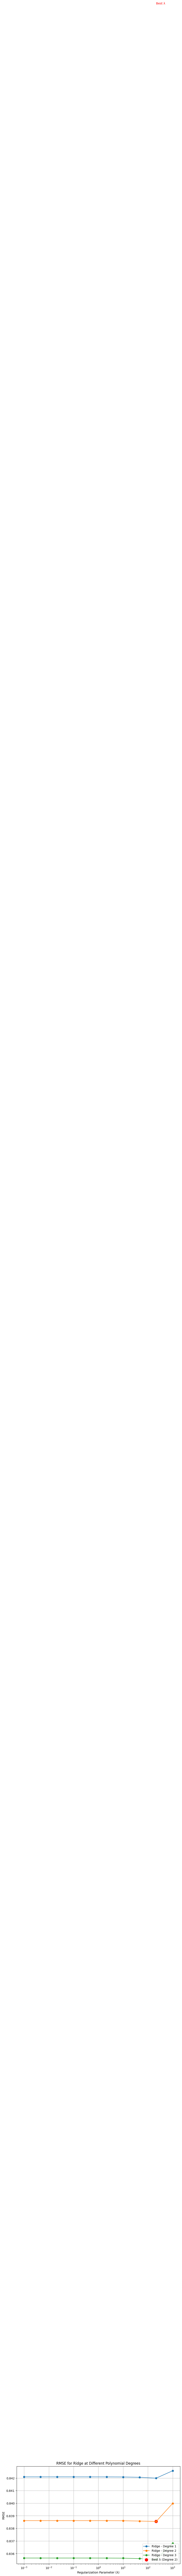

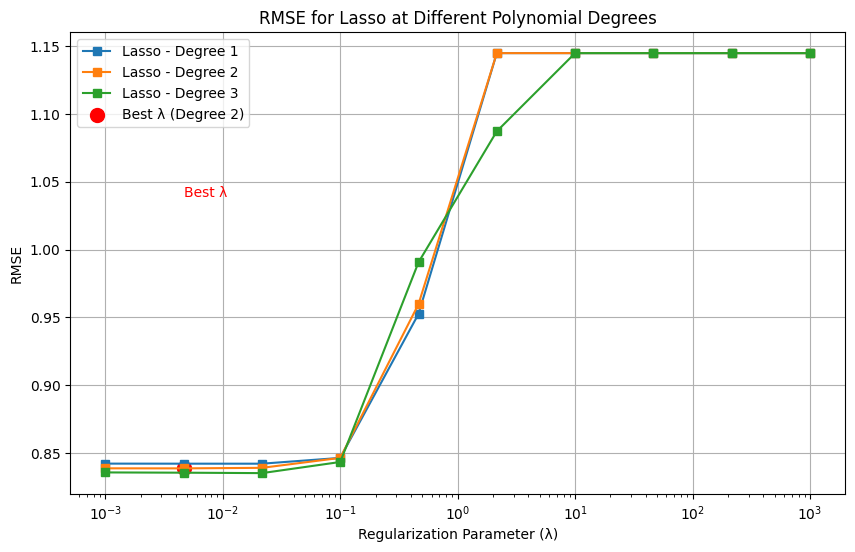

In [113]:
degrees = [1, 2, 3]
lambdas = np.logspace(-3, 3, 10)

ridge_rmse_test = []
lasso_rmse_test = []

# Compute RMSE for each degree and lambda

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    ridge_rmse = []
    lasso_rmse = []

    for alpha in lambdas:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_poly, y_train)
        y_pred_ridge = ridge.predict(X_test_poly)
        ridge_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

        lasso = Lasso(alpha=alpha, max_iter=10000)
        lasso.fit(X_train_poly, y_train)
        y_pred_lasso = lasso.predict(X_test_poly)
        lasso_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

    ridge_rmse_test.append(ridge_rmse)
    lasso_rmse_test.append(lasso_rmse)


# Plot Ridge RMSE with annotations
plt.figure(figsize=(10,6))
for idx, degree in enumerate(degrees):
    plt.plot(lambdas, ridge_rmse_test[idx], marker='o', label=f'Ridge - Degree {degree}')

# Annotation example
best_idx = np.argmin(ridge_rmse_test[1])  # best λ for degree 2
plt.scatter(lambdas[best_idx], ridge_rmse_test[1][best_idx], color='red', s=100, label='Best λ (Degree 2)')
plt.text(lambdas[best_idx], ridge_rmse_test[1][best_idx]+0.2, 'Best λ', color='red')

plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Ridge at Different Polynomial Degrees')
plt.legend()
plt.grid(True)
plt.show()

# Plot Lasso RMSE with annotations
plt.figure(figsize=(10,6))
for idx, degree in enumerate(degrees):
    plt.plot(lambdas, lasso_rmse_test[idx], marker='s', label=f'Lasso - Degree {degree}')

# Annotation example
best_idx = np.argmin(lasso_rmse_test[1])  # best λ for degree 2
plt.scatter(lambdas[best_idx], lasso_rmse_test[1][best_idx], color='red', s=100, label='Best λ (Degree 2)')
plt.text(lambdas[best_idx], lasso_rmse_test[1][best_idx]+0.2, 'Best λ', color='red')

plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for Lasso at Different Polynomial Degrees')
plt.legend()
plt.grid(True)
plt.show()


**Interpreting RMSE Plots for Ridge and Lasso**

When we plot RMSE for Ridge and Lasso across different polynomial degrees and regularization parameters (λ), we can draw several conclusions:

---

**1. Training vs Test Behavior**
- **Training RMSE** usually **decreases** as the polynomial degree increases because the model becomes more flexible and fits the training data better.  
- **Test RMSE** initially decreases, but after a certain degree it may **increase**, indicating **overfitting**.

---

**2. Effect of Regularization (α / λ)**
- Increasing λ:  
  - Large coefficients are penalized → model becomes **simpler and more stable**.  
  - Too large λ → model becomes **too simple** → **underfitting**, test RMSE increases.  
- Too small λ → model is too flexible → **overfitting**, test RMSE may also be high.

---

**3. Ridge vs Lasso**
- **Ridge:**  
  - Keeps all features, shrinks coefficients.  
  - RMSE curve is usually smoother and more stable, even for higher degrees.  
- **Lasso:**  
  - Can shrink some coefficients to zero → performs **feature selection**.  
  - RMSE may fluctuate more at higher degrees or large λ if important features are removed.

---

**4. Key Takeaways from RMSE Plots**
1. **Select the right polynomial degree**:  
   - Look for the degree where **test RMSE is minimal**.  
2. **Select an appropriate λ**:  
   - Choose a λ where **test RMSE is low and stable**.  
3. **Use Ridge** to prevent overfitting, especially with correlated features.  
4. **Use Lasso** to reduce the number of unnecessary features, but beware of removing important features at high λ.  
5. **Balance between bias and variance**:  
   - RMSE plots help find the optimal trade-off.

